In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Common activation functions and derivatives
def sign(x):
    return np.array(x > 0, dtype=int)

def d_sign(x):
    return np.zeros_like(x)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def d_sigmoid(x):
    s = sigmoid(x)
    return s*(1-s)

def relu(x):
    return np.maximum(0, x)

def d_relu(x):
    return np.where(x>0, 1, 0)

def tanh(x):
    return np.tanh(x)

def d_tanh(x):
    return 1 - np.tanh(x)**2

def leaky_relu(x, alpha=0.01):
    return np.where(x>0, x, alpha*x)

def d_leaky_relu(x, alpha=0.01):
    return np.where(x>0, 1, alpha)

# Loss functions & derivatives
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

def d_mse(y, y_hat):
    return 2*(y_hat - y) / len(y)

def mae(y, y_hat):
    return np.mean(np.abs(y - y_hat))

def d_mae(y, y_hat):
    return np.where(y_hat > y, 1, -1) / len(y)

def binary_cross_entropy(y, y_hat):
    eps = 1e-12
    y_hat = np.clip(y_hat, eps, 1 - eps)
    return -np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))

def d_binary_cross_entropy(y, y_hat):
    eps = 1e-12
    y_hat = np.clip(y_hat, eps, 1 - eps)
    return (y_hat - y) / (y_hat*(1-y_hat)*len(y))

In [12]:
print("Array Data: [1,2,3,0,-4,-5]")

act_funs = [
    ("Sign", sign, d_sign),
    ("Sigmoid", sigmoid, d_sigmoid),
    ("ReLU", relu, d_relu),
    ("Tanh", tanh, d_tanh),
    ("Leaky ReLU", leaky_relu, d_leaky_relu)
]

for name, f, df in act_funs:
    print(f"{name}: {f(np.array([1,2,3,0,-4,-5]))}, Derivative: {df(np.array([1,2,3,0,-4,-5]))} \n")

Array Data: [1,2,3,0,-4,-5]
Sign: [1 1 1 0 0 0], Derivative: [0 0 0 0 0 0] 

Sigmoid: [0.73105858 0.88079708 0.95257413 0.5        0.01798621 0.00669285], Derivative: [0.19661193 0.10499359 0.04517666 0.25       0.01766271 0.00664806] 

ReLU: [1 2 3 0 0 0], Derivative: [1 1 1 0 0 0] 

Tanh: [ 0.76159416  0.96402758  0.99505475  0.         -0.9993293  -0.9999092 ], Derivative: [4.19974342e-01 7.06508249e-02 9.86603717e-03 1.00000000e+00
 1.34095068e-03 1.81583231e-04] 

Leaky ReLU: [ 1.    2.    3.    0.   -0.04 -0.05], Derivative: [1.   1.   1.   0.01 0.01 0.01] 



## 啟動函數圖形

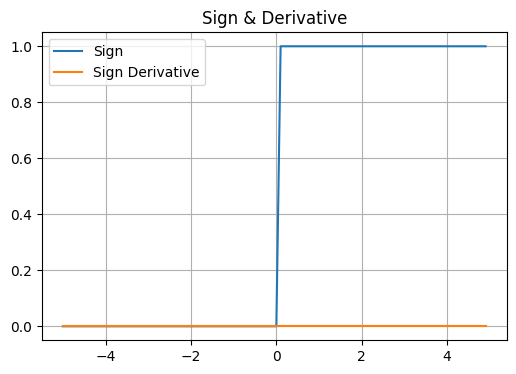

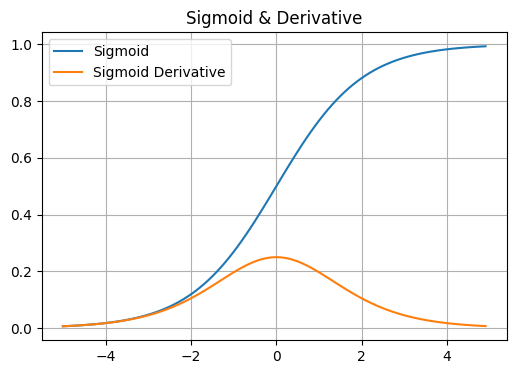

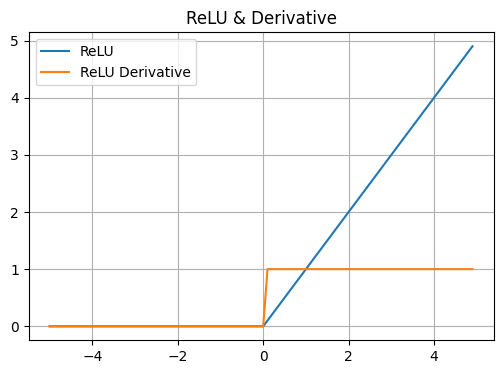

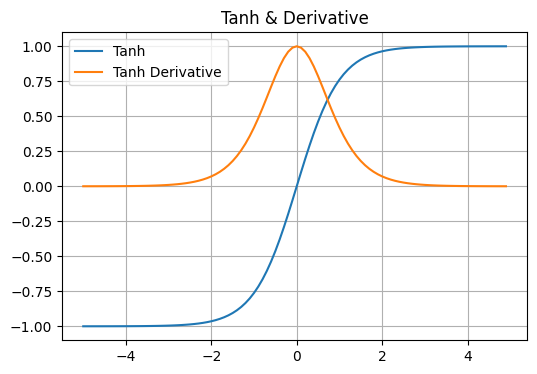

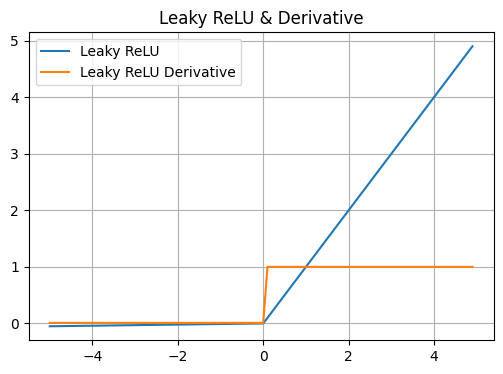

In [13]:
  # Plot activation functions
# x = np.linspace(-5, 5, 400)
x = np.arange(-5, 5, 0.1)

funcs = [
    ("Sign", sign, d_sign),
    ("Sigmoid", sigmoid, d_sigmoid),
    ("ReLU", relu, d_relu),
    ("Tanh", tanh, d_tanh),
    ("Leaky ReLU", leaky_relu, d_leaky_relu)
]

for name, f, df in funcs:
    plt.figure(figsize=(6,4))
    plt.plot(x, f(x), label=f"{name}")
    plt.plot(x, df(x), label=f"{name} Derivative")
    plt.title(f"{name} & Derivative")
    plt.legend()
    plt.grid(True)
    plt.show()

## 損失函數圖形

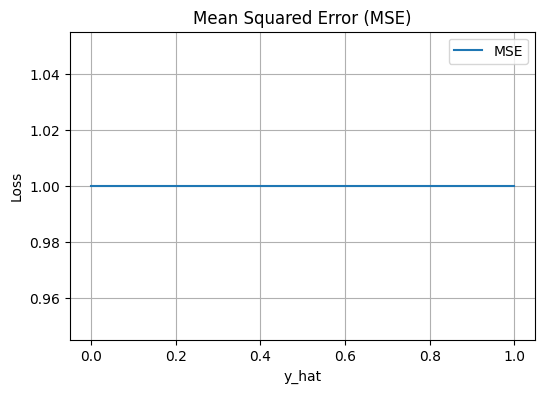

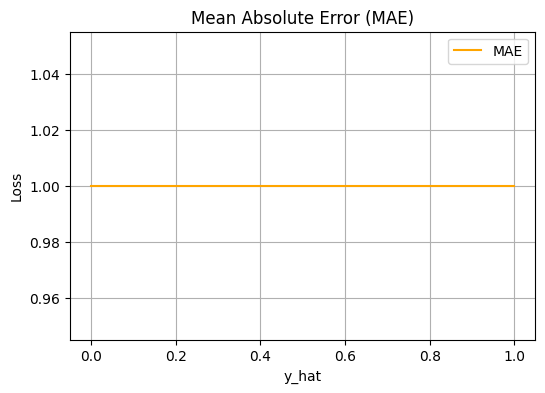

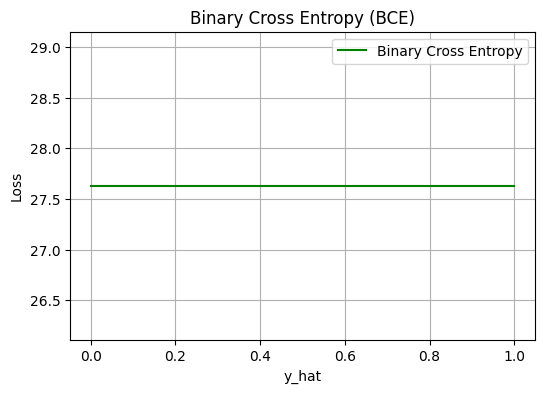

In [ ]:
# Plot loss functions separately
y = np.array([1]*100)
y_hat_vals = np.linspace(0.001, 0.999, 100)

mse_vals = [mse(y, np.full_like(y, v)) for v in y_hat_vals]
mae_vals = [mae(y, np.full_like(y, v)) for v in y_hat_vals]
bce_vals = [binary_cross_entropy(y, np.full_like(y, v)) for v in y_hat_vals]

# MSE
plt.figure(figsize=(6,4))
plt.plot(y_hat_vals, mse_vals, label="MSE")
plt.title("Mean Squared Error (MSE)")
plt.xlabel("y_hat")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

# MAE
plt.figure(figsize=(6,4))
plt.plot(y_hat_vals, mae_vals, label="MAE", color="orange")
plt.title("Mean Absolute Error (MAE)")
plt.xlabel("y_hat")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

# Binary Cross Entropy
plt.figure(figsize=(6,4))
plt.plot(y_hat_vals, bce_vals, label="Binary Cross Entropy", color="green")
plt.title("Binary Cross Entropy (BCE)")
plt.xlabel("y_hat")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()
